In [1]:
import glob
import sys

import numpy as np
import pandas as pd
import tensorflow as tf

sys.path.append("../../")

from helpers.experiment import experiment

/usr/local/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')




Preparing model for Experiment: function_dataset_01_mean



Commencing Experiment: function_dataset_01_mean

Epoch 1/10
1708/1708 [==============================] - 1s 600us/step - loss: 1.7234 - accuracy: 0.4417
Epoch 2/10
1708/1708 [==============================] - 1s 678us/step - loss: 1.4730 - accuracy: 0.5085
Epoch 3/10
1708/1708 [==============================] - 1s 597us/step - loss: 1.4348 - accuracy: 0.5159
Epoch 4/10
1708/1708 [==============================] - 1s 521us/step - loss: 1.4189 - accuracy: 0.5170
Epoch 5/10
1708/1708 [==============================] - 1s 529us/step - loss: 1.4105 - accuracy: 0.5180
Epoch 6/10
1708/1708 [==============================] - 1s 542us/step - loss: 1.4049 - accuracy: 0.5183
Epoch 7/10
1708/1708 [==============================] - 1s 557us/step - loss: 1.4013 - accuracy: 0.5191
Epoch 8/10
1708/1708 [==============================] - 1s 549us/step - loss: 1.3986 - accuracy: 0.5184
Epoch 9/10
1708/1708 [==============================] - 1

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/si

                   precision  recall  f1-score  support      mcc
                                                                
      genre_blues     0.0000  0.0000    0.0000      374  -0.0011
  genre_classical     0.7330  0.8266    0.7770     4221   0.7001
    genre_country     0.0000  0.0000    0.0000      327  -0.0030
      genre_disco     0.0000  0.0000    0.0000      289   0.0000
     genre_hiphop     0.3838  0.3145    0.3457     1701   0.2829
       genre_jazz     0.3640  0.0733    0.1221     1241   0.1368
      genre_metal     0.4407  0.0391    0.0718      665   0.1223
        genre_pop     0.4048  0.6327    0.4937     4274   0.2860
     genre_reggae     0.2632  0.0063    0.0124      788   0.0345
       genre_rock     0.5193  0.6344    0.5711     3200   0.4635
                                                                
         accuracy                       0.5199    17080   0.3940
        macro avg     0.3109  0.2527    0.2394    17080         
     weighted avg     0.4

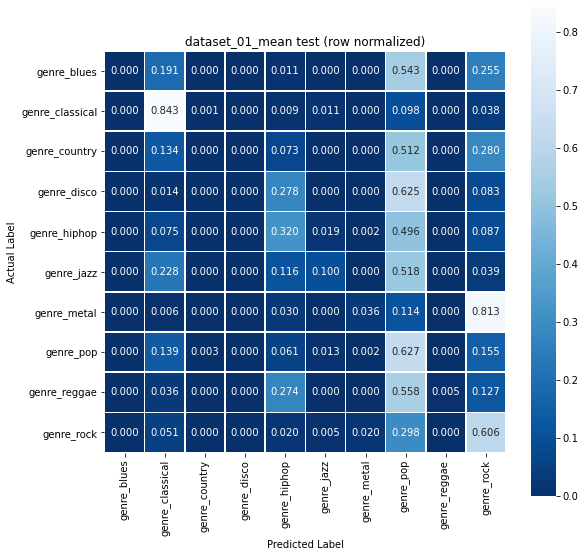

In [4]:
dataset_folder = "../../datasets/"
# datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
datasets = [f'{dataset_folder}dataset_01_mean.pickle']

learning_rate = 0.01
batch_size = 10
epochs = 10
hidden_layers = 0 # should be 0 for baseline model
hidden_size = 10

def nn_model_factory(X_train,y_train,le):
    model = tf.keras.Sequential()
    for _ in range(hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=hidden_size,
            activation='tanh'
        ))
    model.add(tf.keras.layers.Dense(
        units=10,
        activation='softmax'
    ))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',     
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    return model

def nn_fit_call_fn(model,X_train,y_train,sample_weight):
    model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        class_weight=sample_weight,
        verbose=1
   )
    
for dataset in datasets:

    experiment(
        nn_model_factory,
        dataset,
        model_fit_call_fn=nn_fit_call_fn,
        postprocess_y_pred_fn=lambda y: np.argmax(y, axis=-1)
    )
    

In [ ]:
# isfunction(aa)